In [2]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

#load the the data
df = pd.read_csv('climate_action_data.csv')
#print(df)
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [3]:
df.info()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


(913, 10)

In [4]:
#descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [5]:
#checking for missing value
print('missing values in each column')
df.isnull().sum()

missing values in each column


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [6]:
#handling missing values
df = pd.read_csv('climate_action_data.csv')
string_col = ['Sensor_ID', 'Crop_Type', 'Drone_Image_ID']
for col in string_col:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
print('missing values in each column')        
df.isnull().sum()

missing values in each column


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [7]:
#handling wrong data formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Volume' with the median
        df[col] = df[col].fillna(df[col].mean())

In [8]:
categorical_cols = ['Sensor_ID','Crop_Type','Drone_Image_ID']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
# Wrong Data Types
import numpy as np
statistics_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in statistics_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

In [10]:
#duplicated values
print('duplicated values')
df.duplicated().sum()

duplicated values


np.int64(111)

In [11]:
#removing duplicated values
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
print("Number of duplicate dates:", df['Date'].duplicated().sum())
df = df.drop_duplicates(subset=['Date'], keep='first')
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [12]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

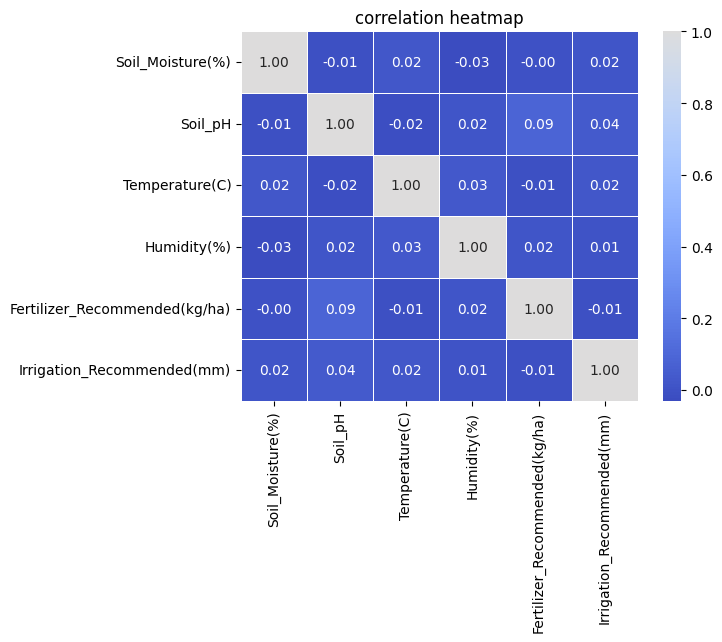

In [13]:
# Analysis of data
# Correlation
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']].corr()
plt.Figure(figsize=(110, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('correlation heatmap')
plt.show()

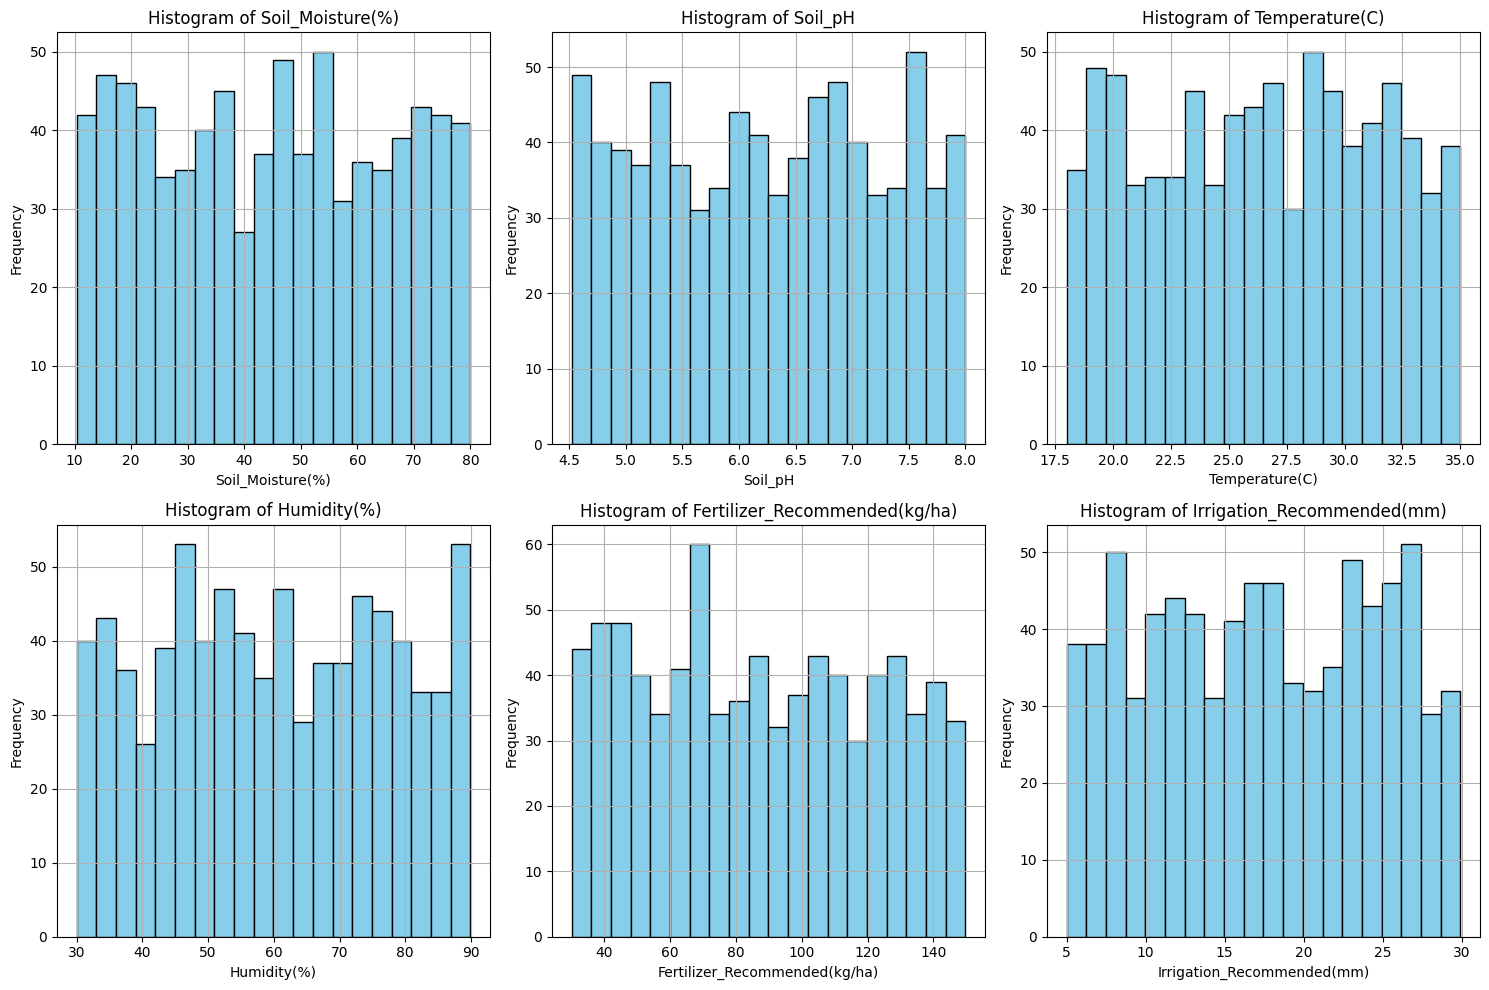

In [14]:
#analysis using histogram
statistics_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
# Set up the figure
plt.figure(figsize=(15, 10))  # width, height

# Loop over each column to plot a histogram
for i, col in enumerate(statistics_cols):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns of plots
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
#analysis, identify which variables most influence fertilizer recommendations
#variables most influencing fertilizer recommendation

if 'Fertilizer_Recommended(kg/ha)' in df.columns:

    corr_matrix = df[numeric_cols].corr()

    corr_fert = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

    print("Top variables influencing fertilizer recommendation:")

    print(corr_fert)

Top variables influencing fertilizer recommendation:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085342
Humidity(%)                      0.017321
Soil_Moisture(%)                -0.000941
Temperature(C)                  -0.007327
Irrigation_Recommended(mm)      -0.012931
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [16]:
#determine the crop type with the highest average soil moisture
#crop type with highest average soil moisture
if 'Crop_Type' in df.columns and 'Soil_Moisture(%)' in df.columns:
    crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
    
    # Print the result
    print("Average soil moisture for each crop type:")
    print(crop_moisture)
    top_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
    print(f"Crop type with highest average soil moisture: {top_crop}")

Average soil moisture for each crop type:
Crop_Type
Beans       44.333047
Lettuce     42.927334
Maize       44.948968
Tomatoes    44.011438
Wheat       47.352387
Name: Soil_Moisture(%), dtype: float64
Crop type with highest average soil moisture: Wheat


In [17]:
#irrigation suggestions for crops with AVG temp >30.
if 'Crop_Type' in df.columns and 'Temperature(C)' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30]
    avg_moisture = high_temp_crops.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
    print("Suggested irrigation adjustments for high-temp crops:")
    print(avg_moisture.apply(lambda x: 'Increase' if x < 50 else 'Maintain'))

Suggested irrigation adjustments for high-temp crops:
Crop_Type
Beans       Increase
Lettuce     Increase
Maize       Increase
Tomatoes    Increase
Wheat       Increase
Name: Soil_Moisture(%), dtype: object
